In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

y = mx + b

b = 5

In [6]:
x_data = np.linspace(0.0,10.0,1000000) + np.random.randn(len(x_data)) # the last is noise

In [7]:
y_true = (0.5 * x_data) + 5 + np.random.randn(len(x_data)) # the last is just noise

In [12]:
x_df = pd.DataFrame(x_data, columns=['X Data'])
y_df = pd.DataFrame(y_true, columns=['Y'])

my_data = pd.concat([x_df, y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.826662,5.727381
1,0.271932,6.129298
2,-0.211675,2.949506
3,-0.816140,3.337044
4,-0.704435,3.904649


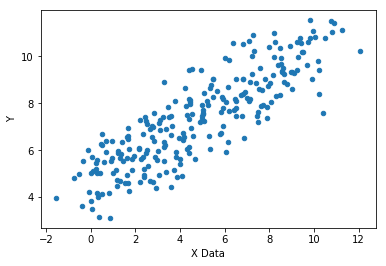

In [18]:
my_data.sample(n=250).plot(kind='scatter', x= 'X Data', y='Y')

In [20]:
batch_size = 8

In [21]:
np.random.randn(2)

array([0.59296233, 0.94586891])

In [22]:
m = tf.Variable(0.59)
b = tf.Variable(0.94)

In [23]:
xph = tf.placeholder(tf.float32, [batch_size])

In [24]:
yph = tf.placeholder(tf.float32, [batch_size])

In [25]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [28]:
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
        
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [38]:
model_m

0.5023771

In [39]:
model_b

4.959247

In [40]:
y_hat = x_data*model_m + model_b

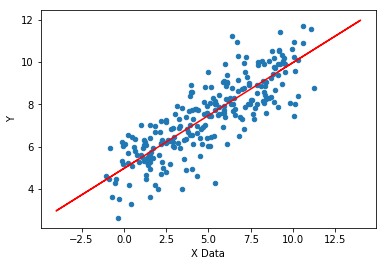

In [43]:
my_data.sample(n=250).plot(kind='scatter', x= 'X Data', y='Y')
plt.plot(x_data, y_hat, 'r')